In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from loss import MeanSquareError
from gradient_descent import gradient_descent, get_stop
from model import LinearRegressionModel, PolynomialRegressionModel

In [2]:
DATASET_SIZE = 1000
MIN_CORRELATION = 0.3
outcome = "median_house_value"

In [3]:
dataset = pd.read_csv("housing.csv").head(DATASET_SIZE).dropna()

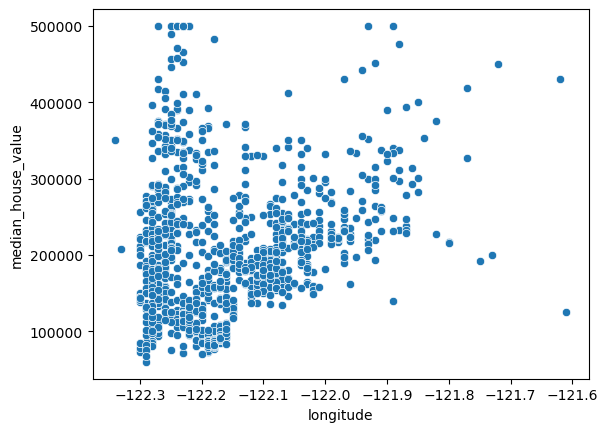

pearson = 0.19753359152364


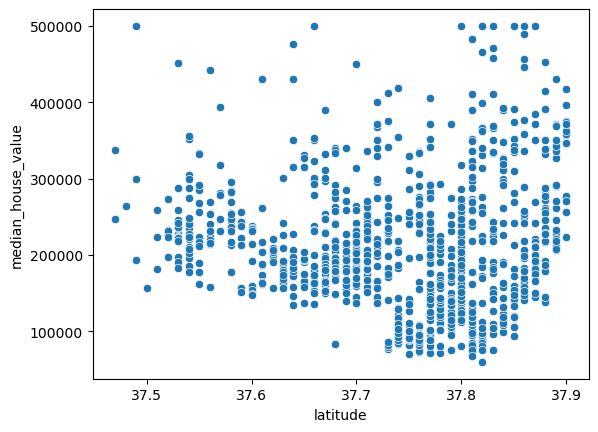

pearson = 0.00017775350802066818


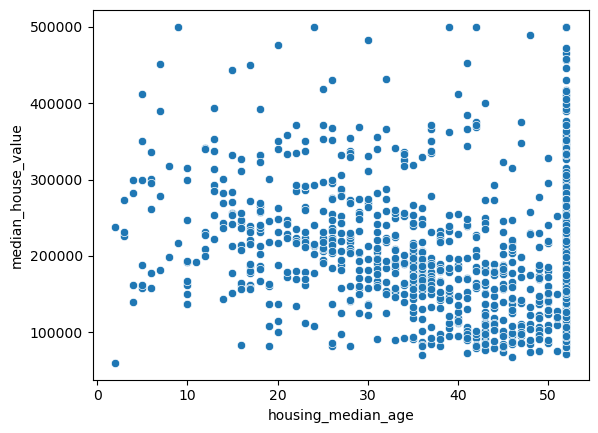

pearson = -0.13859058324727058


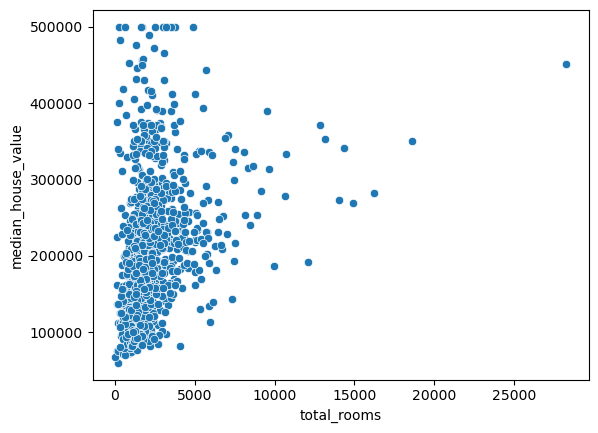

pearson = 0.30621987953619323


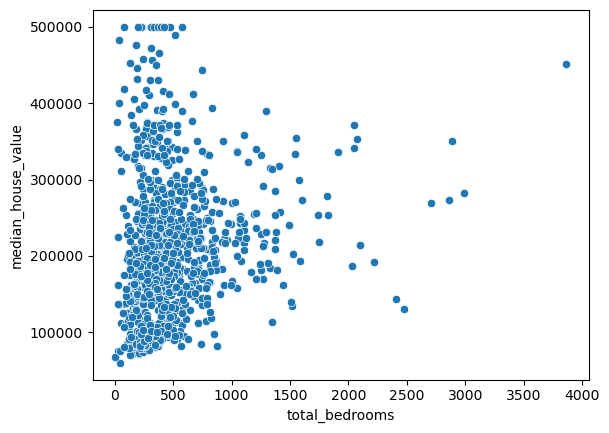

pearson = 0.15803381073302278


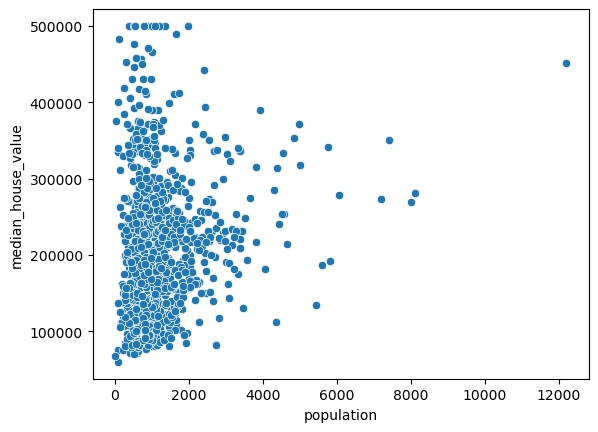

pearson = 0.1525803023893837


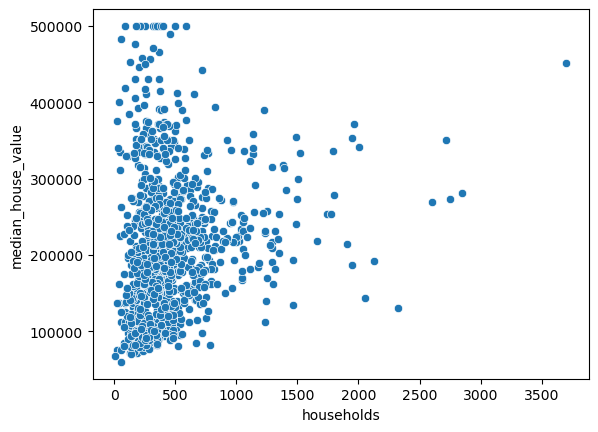

pearson = 0.17673235567795748


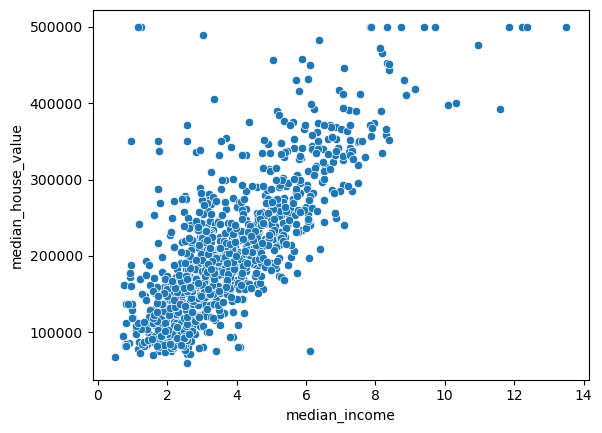

pearson = 0.7667496378577251


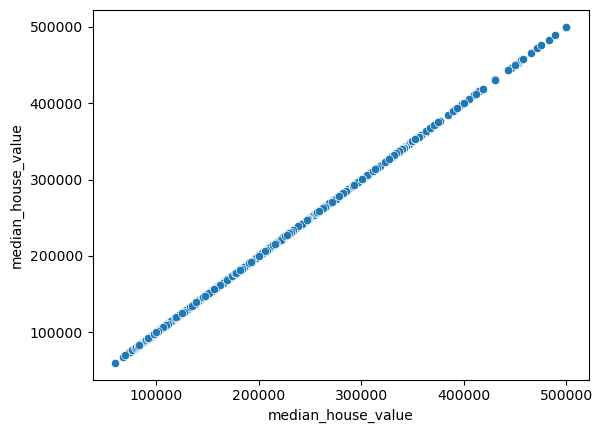

pearson = 1.0


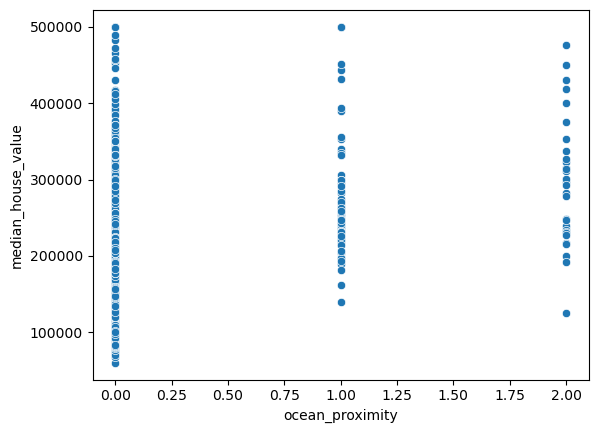

pearson = 0.260422085710453


['total_rooms', 'median_income']

In [4]:
feats = []
for feat in dataset:
    if isinstance(dataset[feat][0], str):
        dataset[feat] = pd.factorize(dataset[feat])[0]
        pd.factorize(dataset[feat])
    kwargs = {
        "x": dataset[feat],
        "y": dataset[outcome]
    }
    sns.scatterplot(**kwargs)
    plt.show()
    if (r := scipy.stats.pearsonr(**kwargs).statistic) >= MIN_CORRELATION:
        feats.append(feat)
    print(f"pearson = {r}")
feats.remove(outcome)
feats

In [5]:
for arg in [*feats, outcome]:
    dataset[arg] = (dataset[arg] - dataset[arg].min()) / (dataset[arg].max() - dataset[arg].min())

dataset["ones"] = 1
feats.append("ones")

test = dataset.tail(DATASET_SIZE // 4)
dataset = dataset.head(3 * DATASET_SIZE // 4)

dataset[feats]

,total_rooms,median_income,ones
0,0.030730,0.601988,1
1,0.250903,0.600157,1
2,0.051512,0.519844,1
3,0.044679,0.395658,1
4,0.057176,0.257426,1
...,...,...,...
751,0.114246,0.211292,1
752,0.103377,0.210922,1
753,0.074064,0.259641,1
754,0.059548,0.426968,1


In [6]:
def learn_error(title, batch, subtitle, model_type, model_kwargs, kwargs):
    errors = []
    iterations = []
    model = model_type(**model_kwargs)
    mse = MeanSquareError(model)
    for iteration in (np.arange(15) + 1):
        gradient_descent(model, batch_size=batch, **kwargs)
        
        errors.append(mse(test))
        iterations.append(iteration * kwargs["max_iteration"])

    sns.lineplot(
        x=iterations,
        y=errors,
    )
    plt.suptitle(subtitle)
    plt.title(f'График зависимости значения ошибки от количества итераций\n{title}')
    plt.xlabel('Количество итераций')
    plt.ylabel('Ошибка на тестовой выборке')
    plt.show()

In [7]:
def learn_accuracy(title, batch, subtitle, model_type, model_kwargs, kwargs):
    kw = kwargs.copy()
    accuracies = []
    iterations = [0]
    errors = []
    model = model_type(**model_kwargs)
    error = MeanSquareError(model)
    for limit in (np.arange(10, 0, -1) * 2 ** -9):
        kw["stop"] = get_stop(limit)
        
        iteration, _ = gradient_descent(model, batch_size=batch,  **kw)
 
        accuracies.append(limit)
        errors.append(error(test))
        iterations.append(iterations[-1] + iteration)
        
    iterations = iterations[1:]
    
    sns.pointplot(
        x=accuracies,
        y=iterations,

    )
    
    plt.suptitle(subtitle)
    plt.title(f'График зависимости количества итераций от заданной точности\n{title}')
    plt.xlabel(f'Порог точности')
    plt.ylabel('Количество итераций')
    plt.show()
    
    sns.pointplot(
        x=accuracies,
        y=errors,
    )
    plt.suptitle(subtitle)
    plt.title(f'График зависимости значения ошибки от заданной точности\n{title}')
    plt.xlabel(f'Порог точности')
    plt.ylabel('Ошибка')
    plt.show()

In [8]:
def learn_batch(title, subtitle, model_type, model_kwargs, kwargs):
    sizes = []
    iterations = []
    errors = []
    for batch in (10 + np.arange(9) * 10):
        model = model_type(**model_kwargs)
        error = MeanSquareError(model)
        
        iteration, _ = gradient_descent(model, batch_size=batch, **kwargs)

        sizes.append(batch)
        errors.append(error(test))
        iterations.append(iteration)
    
    sns.pointplot(
        x=sizes,
        y=iterations,
    )
    
    plt.suptitle(subtitle)
    plt.title(f'График зависимости количества итераций от размера пакета\n{title}')
    plt.xlabel(f'Размер пакета')
    plt.ylabel('Количество итераций')
    plt.show()
    
    sns.pointplot(
        x=sizes,
        y=errors,
    )
    plt.suptitle(subtitle)
    plt.title(f'График зависимости значения ошибки от размера пакета\n{title}')
    plt.xlabel(f'Размер пакета')
    plt.ylabel('Ошибка')
    plt.show()

In [9]:
examples = [
    {
        "model_type": LinearRegressionModel,
        "kwargs":
            {
                "dataset": dataset,
                "stop": lambda error: False,
                "rate": 0.001,
                "max_iteration": 2000
            },
        "model_kwargs":
            {
                "features": feats,
                "outcome": outcome,
            },
        "subtitle": "Линейная регрессия",
    },
    {
        "model_type": PolynomialRegressionModel,
        "kwargs":
            {
                "dataset": dataset,
                "stop": lambda error: False,
                "rate": 0.001,
                "max_iteration": 2000
            },
        "model_kwargs":
            {
                "features": feats,
                "outcome": outcome,
                "degree": 5
            },
        "subtitle": "Полтномиальная регрессия",
    }
]

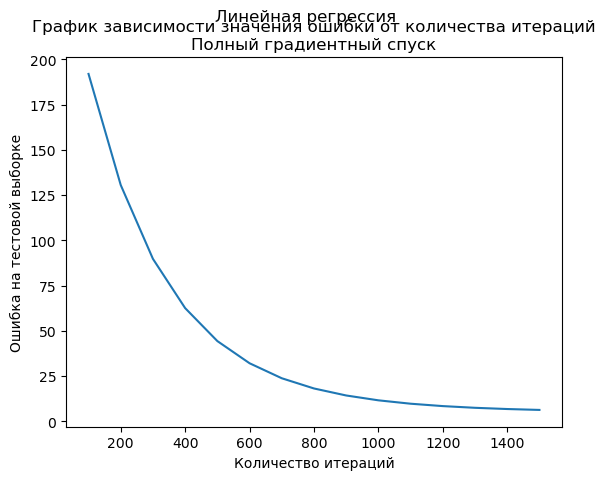

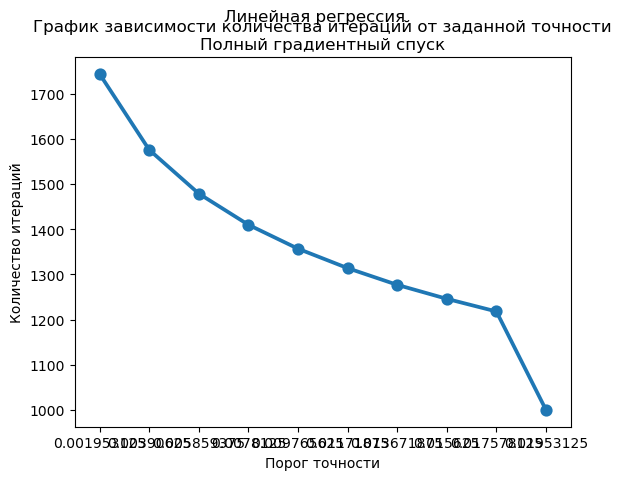

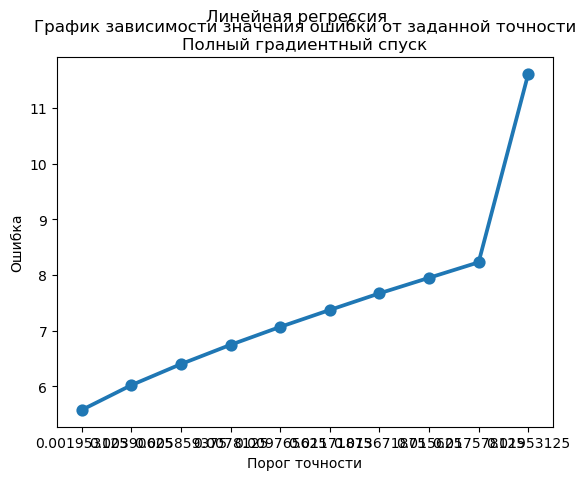

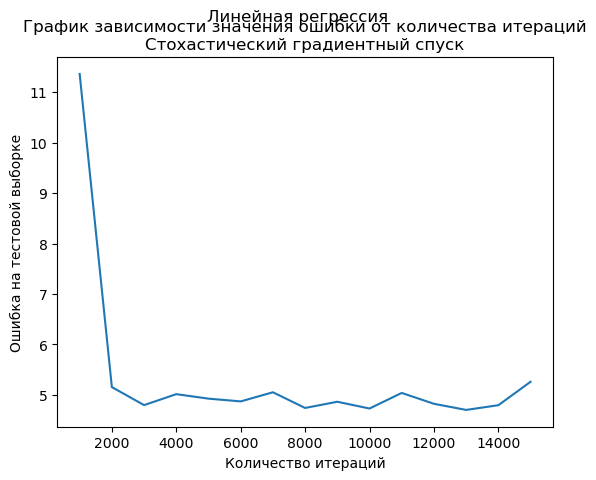

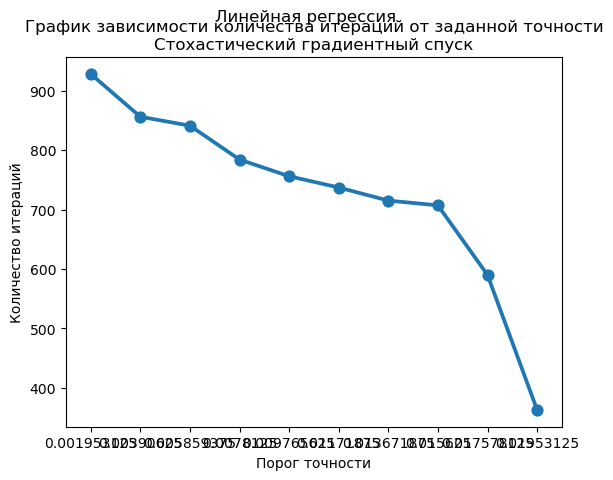

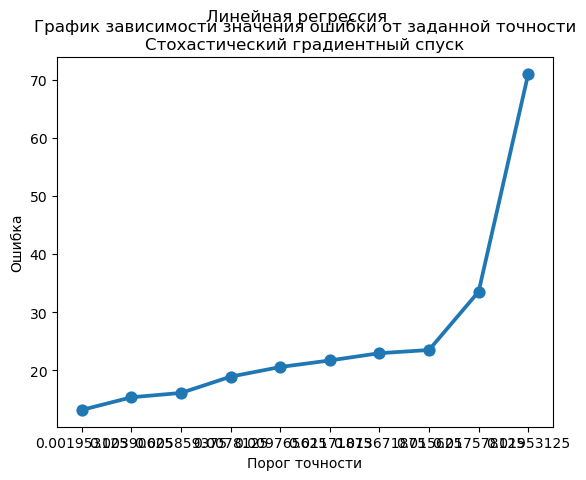

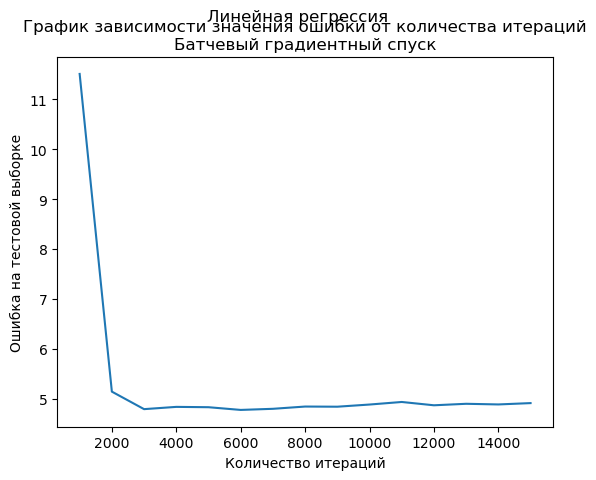

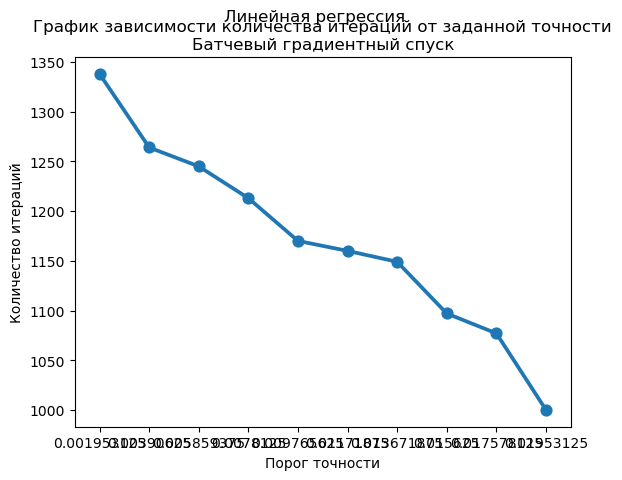

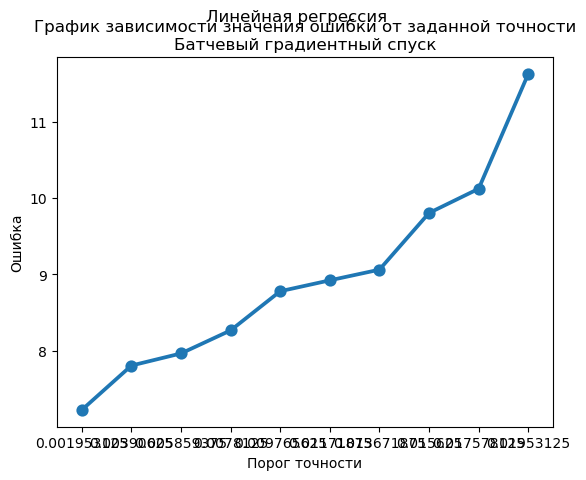

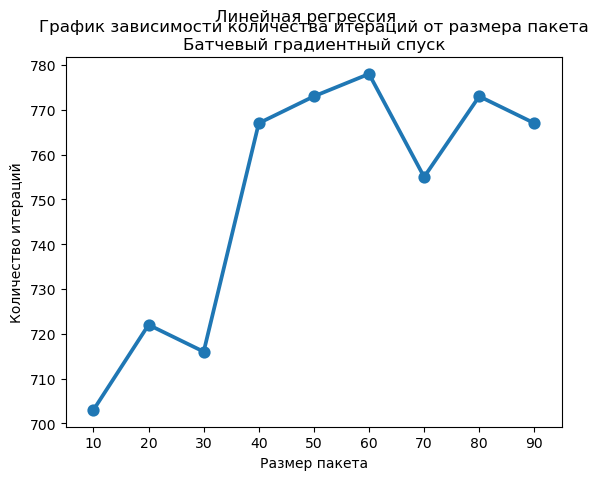

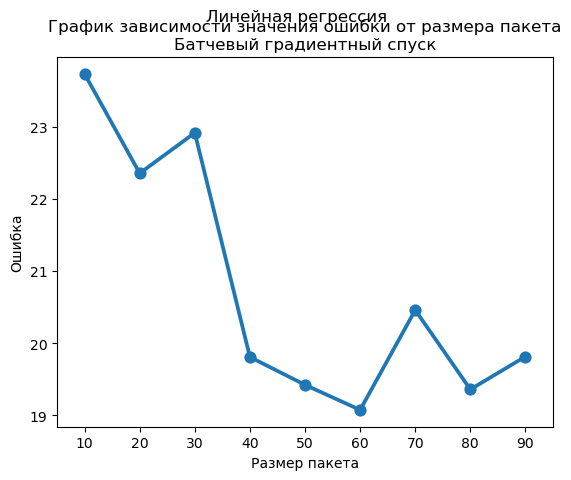

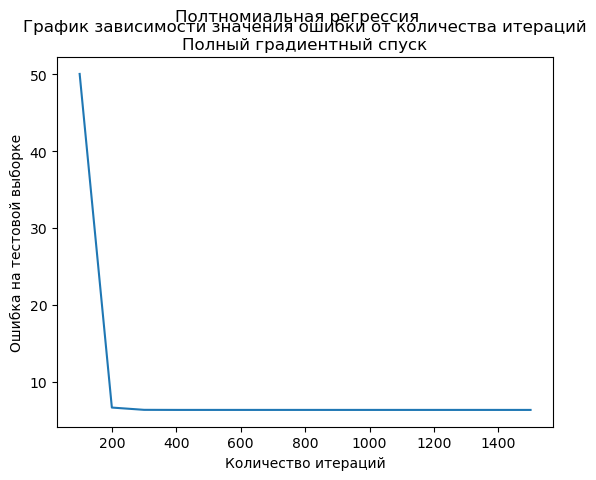

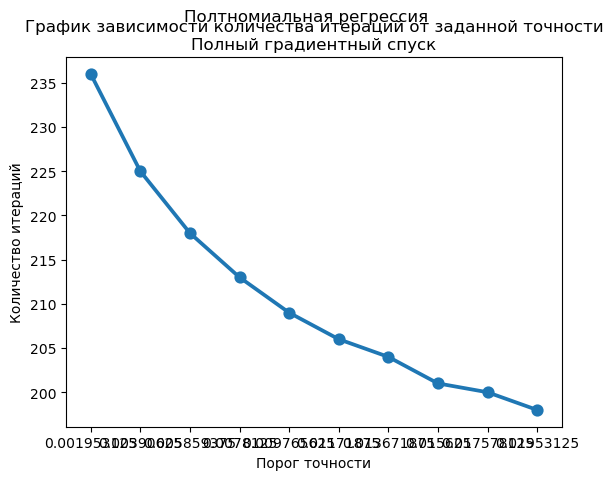

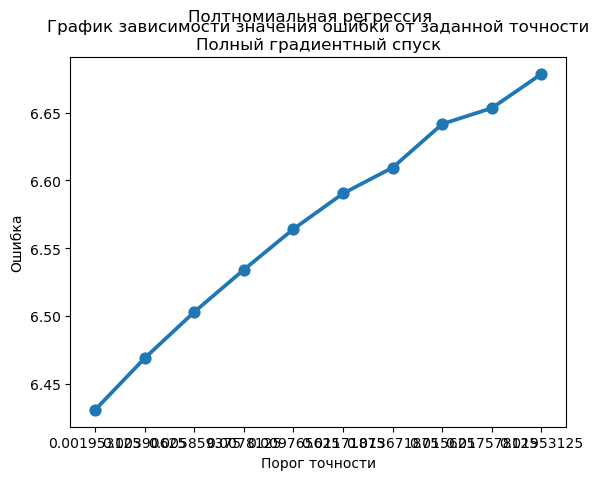

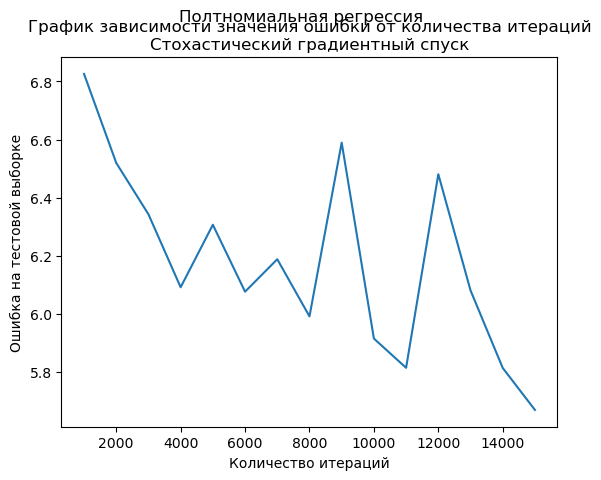

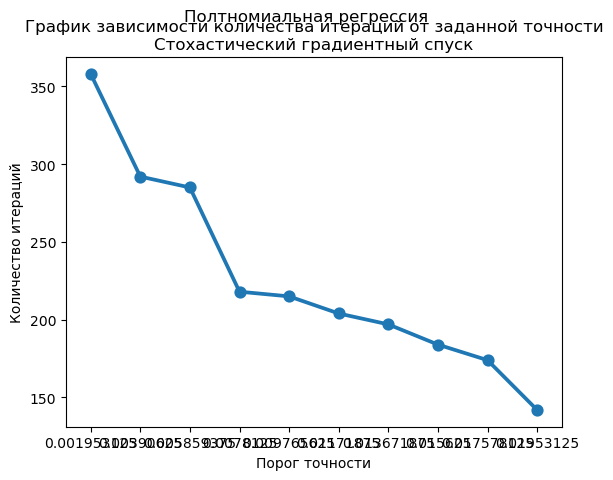

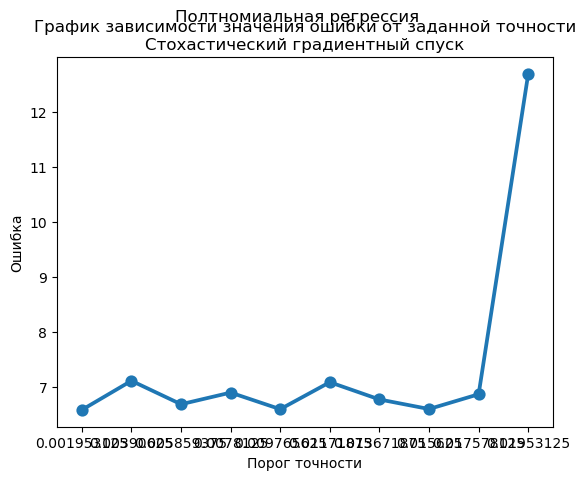

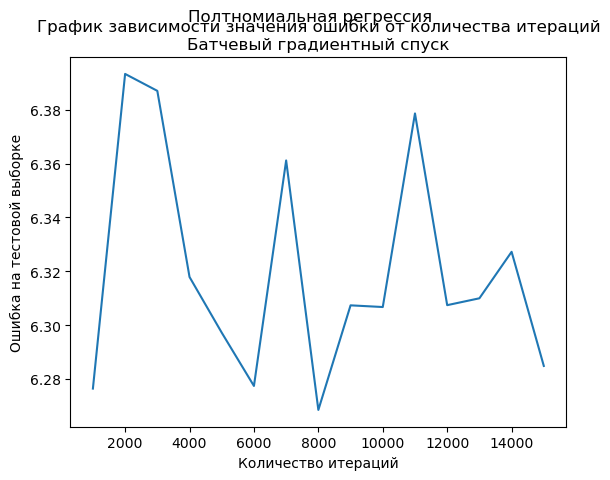

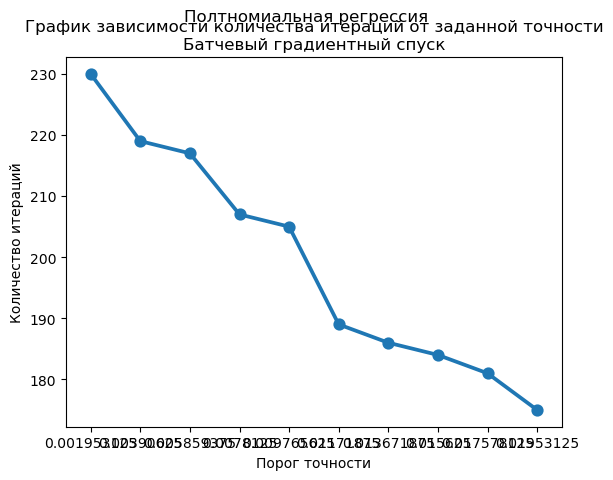

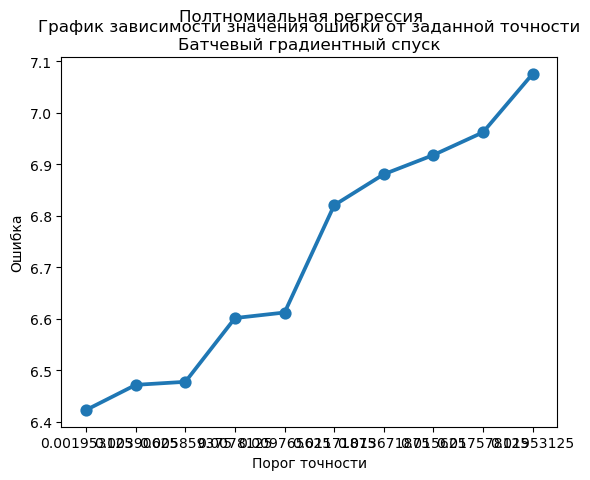

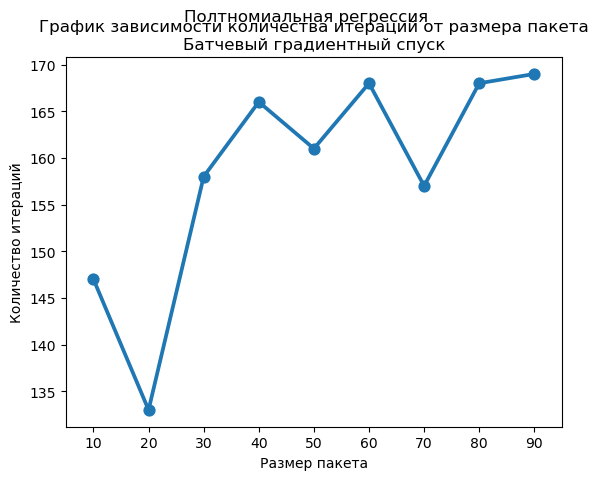

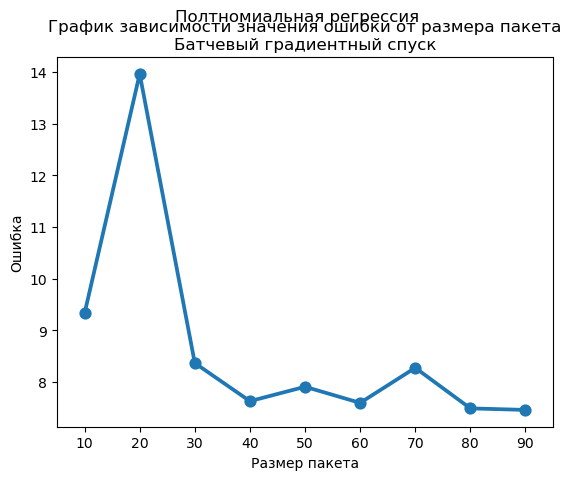

In [10]:
for example in examples:
    example["kwargs"]["max_iteration"] = 100
    for batch, name in (
        (-1, "Полный градиентный спуск"),
        (1, "Стохастический градиентный спуск"),
        (30, "Батчевый градиентный спуск"),
    ):
        learn_error(name, batch, **example)
        example["kwargs"]["max_iteration"] = 1000
        learn_accuracy(name, batch, **example)
    example["kwargs"]["max_iteration"] = 10000
    example["kwargs"]["stop"] = get_stop(0.1)
    learn_batch("Батчевый градиентный спуск", **example)